In [1]:
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import geopandas as gpd
import os

import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

import platform
if platform.system() =='Linux': path='/home/clc/Desktop/AGF350_data/Data/'
elif platform.system() =='Windows': path='../Data/'

terrain = plt.get_cmap('terrain')
terrain_truncated = truncate_colormap(terrain, 0.2, .9)

In [2]:
stations = pd.read_csv(path+'instrument_textbook_BLcourse_spring2025(BL instruments).csv', 
                       skipfooter=2, encoding='latin1')
# parse_dates=[['Setup time (UTC)','Retrieval time (UTC)','Maintenance start time (UTC)']])
stations['Setup time (UTC)'] = pd.to_datetime(stations['Setup time (UTC)'], format='%m/%d/%y %H:%M')
stations['Retrieval time (UTC)'] = pd.to_datetime(stations['Retrieval time (UTC)'], format='%m/%d/%y %H:%M')
stations['Maintenance start time (UTC)'] = pd.to_datetime(stations['Maintenance start time (UTC)'], format='%m/%d/%y %H:%M')
stations

/tmp/ipykernel_121426/1203934403.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  stations = pd.read_csv(path+'instrument_textbook_BLcourse_spring2025(BL instruments).csv',


,Station name,Category,Setup by group,Quantities measured,LAT (dec deg),LON (dec deg),elevation from GPS (masl),elevation from DEM (masl),Radiometer height(m),Th height (m),Anemometer height (m),CEB orientation (Tg),Setup time (UTC),Retrieval time (UTC),Maintenance start time (UTC),Maintenance duration (minutes),Comments,Unnamed: 17
0,Layla,AWS-P,3,"T, Ws, Wd, Tg, P",78.172686,16.010102,186 (NOT ACCURATE),28.2,NaN,1.820,2.09,NE,2025-01-26 11:25:00,2025-02-03 11:10:00,2025-01-30 09:40:00,30.0,NaN,NaN
1,TH3,Tinytag,3,"T, Rh",78.181669,15.908088,181 (NOT ACCURATE),20.9,NaN,1.400,NaN,NaN,2025-01-26 12:30:00,2025-02-03 11:54:00,2025-01-30 10:15:00,10.0,NaN,NaN
2,TH2,Tinytag,3,"T, Rh",78.212169,15.756418,160 (NOT ACCURATE),1.0,NaN,1.650,NaN,NaN,2025-01-26 12:45:00,2025-02-03 12:04:00,2025-01-30 10:35:00,15.0,NaN,NaN
3,Tom Joad,AWS,3,"T, Ws, Wd, Tg",78.226178,15.650295,NaN,0.5,NaN,1.900,2.21,N,2025-01-26 14:30:00,2025-02-03 12:14:00,2025-01-30 10:50:00,15.0,NaN,NaN
4,Rosanna,AWS-P,3,"T, Ws, Wd, Tg, P",78.239350,15.749290,NaN,1.4,NaN,1.680,2.05,NE,2025-01-27 10:30:00,2025-02-03 09:10:00,2025-01-31 10:50:00,40.0,NaN,NaN
5,TH5,Tinytag,3,"T, Rh",78.223609,15.797014,NaN,3.6,NaN,1.650,NaN,NaN,2025-01-27 11:10:00,2025-02-03 09:44:00,2025-01-31 12:17:00,6.0,NaN,NaN
6,Bette Davis,AWS,3,"T, Ws, Wd, Tg",78.213555,15.857184,53 (NOT ACCURATE),4.4,NaN,1.700,2.08,N,2025-01-27 12:10:00,2025-02-03 09:52:00,2025-01-31 13:05:00,53.0,NaN,NaN
7,TH6,Tinytag,3,"T, Rh",78.197500,15.959215,72 (NOT ACCURATE),10.9,NaN,1.570,NaN,NaN,2025-01-27 13:30:00,2025-02-03 10:23:00,2025-01-31 15:05:00,8.0,NaN,NaN
8,Mrs Robinson,AWS,3,"T, Ws, Wd, Tg",78.192157,16.029810,76 (NOT ACCURATE),17.3,NaN,1.780,2.09,W,2025-01-27 13:40:00,2025-02-03 10:37:00,2025-01-31 16:00:00,30.0,NaN,NaN
9,TH1,TinyTag,1,"T, Rh",78.240911,15.354190,265 (NOT ACCURATE),27.5,NaN,1.490,NaN,NaN,2025-01-27 10:58:00,2025-02-03 12:48:00,NaT,NaN,NaN,tiny tag between fjord station and Björndalen


## DEM

In [3]:
compute = False
if compute:
    fnames = ! ls /home/clc/Desktop/svalbard_DEM/*/*.tif
    for fn in fnames:
        ds = rxr.open_rasterio(fn).rio.reproject('EPSG:4326')
        print(fn.split('/')[-1]+': ', [ds.x.data.min(), ds.x.data.max(), ds.y.data.min(), ds.y.data.max()])

Potential ones:
- S0_DTM2_5_2009_13835_33_Longyearbyenomr
- S0_DTM5_2011_25162_33

In [4]:
DEM = rxr.open_rasterio(path+'DEM/NPI_DEM/DEM_AGF350.tif').squeeze()

## More pretty stuff

/home/clc/micromamba/envs/rxr/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/home/clc/micromamba/envs/rxr/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/home/clc/micromamba/envs/rxr/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/home/clc/micromamba/envs/rxr/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/home/clc/micromamba/envs/rxr/lib/python3.12/site-packages/pyogrio/raw.p

(78.15, 78.26)

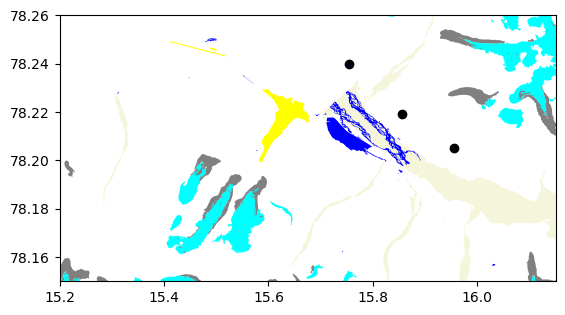

In [34]:
fig, ax = plt.subplots()

flood_plains = gpd.read_file(path+'DEM/NPI_DEM/1-100000_map/NP_S100_SHP/S100_Elvesletter_f.shp'
                            ).force_2d().to_crs('EPSG:4326')
flood_plains.plot(ax=ax, color='beige')

glaciers = gpd.read_file(path+'DEM/NPI_DEM/1-100000_map/NP_S100_SHP/S100_Isbreer_f.shp'
                            ).force_2d().to_crs('EPSG:4326')
glaciers.plot(ax=ax, color='cyan')

moraine = gpd.read_file(path+'DEM/NPI_DEM/1-100000_map/NP_S100_SHP/S100_Morener_f.shp'
                            ).force_2d().to_crs('EPSG:4326')
moraine.plot(ax=ax, color='grey')

pingos = gpd.read_file(path+'DEM/NPI_DEM/1-100000_map/NP_S100_SHP/S100_Pingoer_p.shp'
                            ).force_2d().to_crs('EPSG:4326')
pingos.plot(ax=ax, color='k')

city = gpd.read_file(path+'DEM/NPI_DEM/1-100000_map/NP_S100_SHP/S100_TekniskSituasjon_f.shp'
                            ).force_2d().to_crs('EPSG:4326')
city.plot(ax=ax, color='yellow')
   
lake = gpd.read_file(path+'DEM/NPI_DEM/1-100000_map/NP_S100_SHP/S100_Vann_f.shp'
                            ).force_2d().to_crs('EPSG:4326')
lake.plot(ax=ax, color='blue')


#ax.set_xlim(505_000, 540_000)
#ax.set_ylim(8.67e6, 8.69e6)

ax.set_xlim(15.2, 16.15)
ax.set_ylim(78.15, 78.26)

## Plot

/tmp/ipykernel_121426/2064348081.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(*np.meshgrid(DEM.x, DEM.y), DEM.data.squeeze(), levels=np.arange(0, 1000, 50), color='grey', alpha=.3)


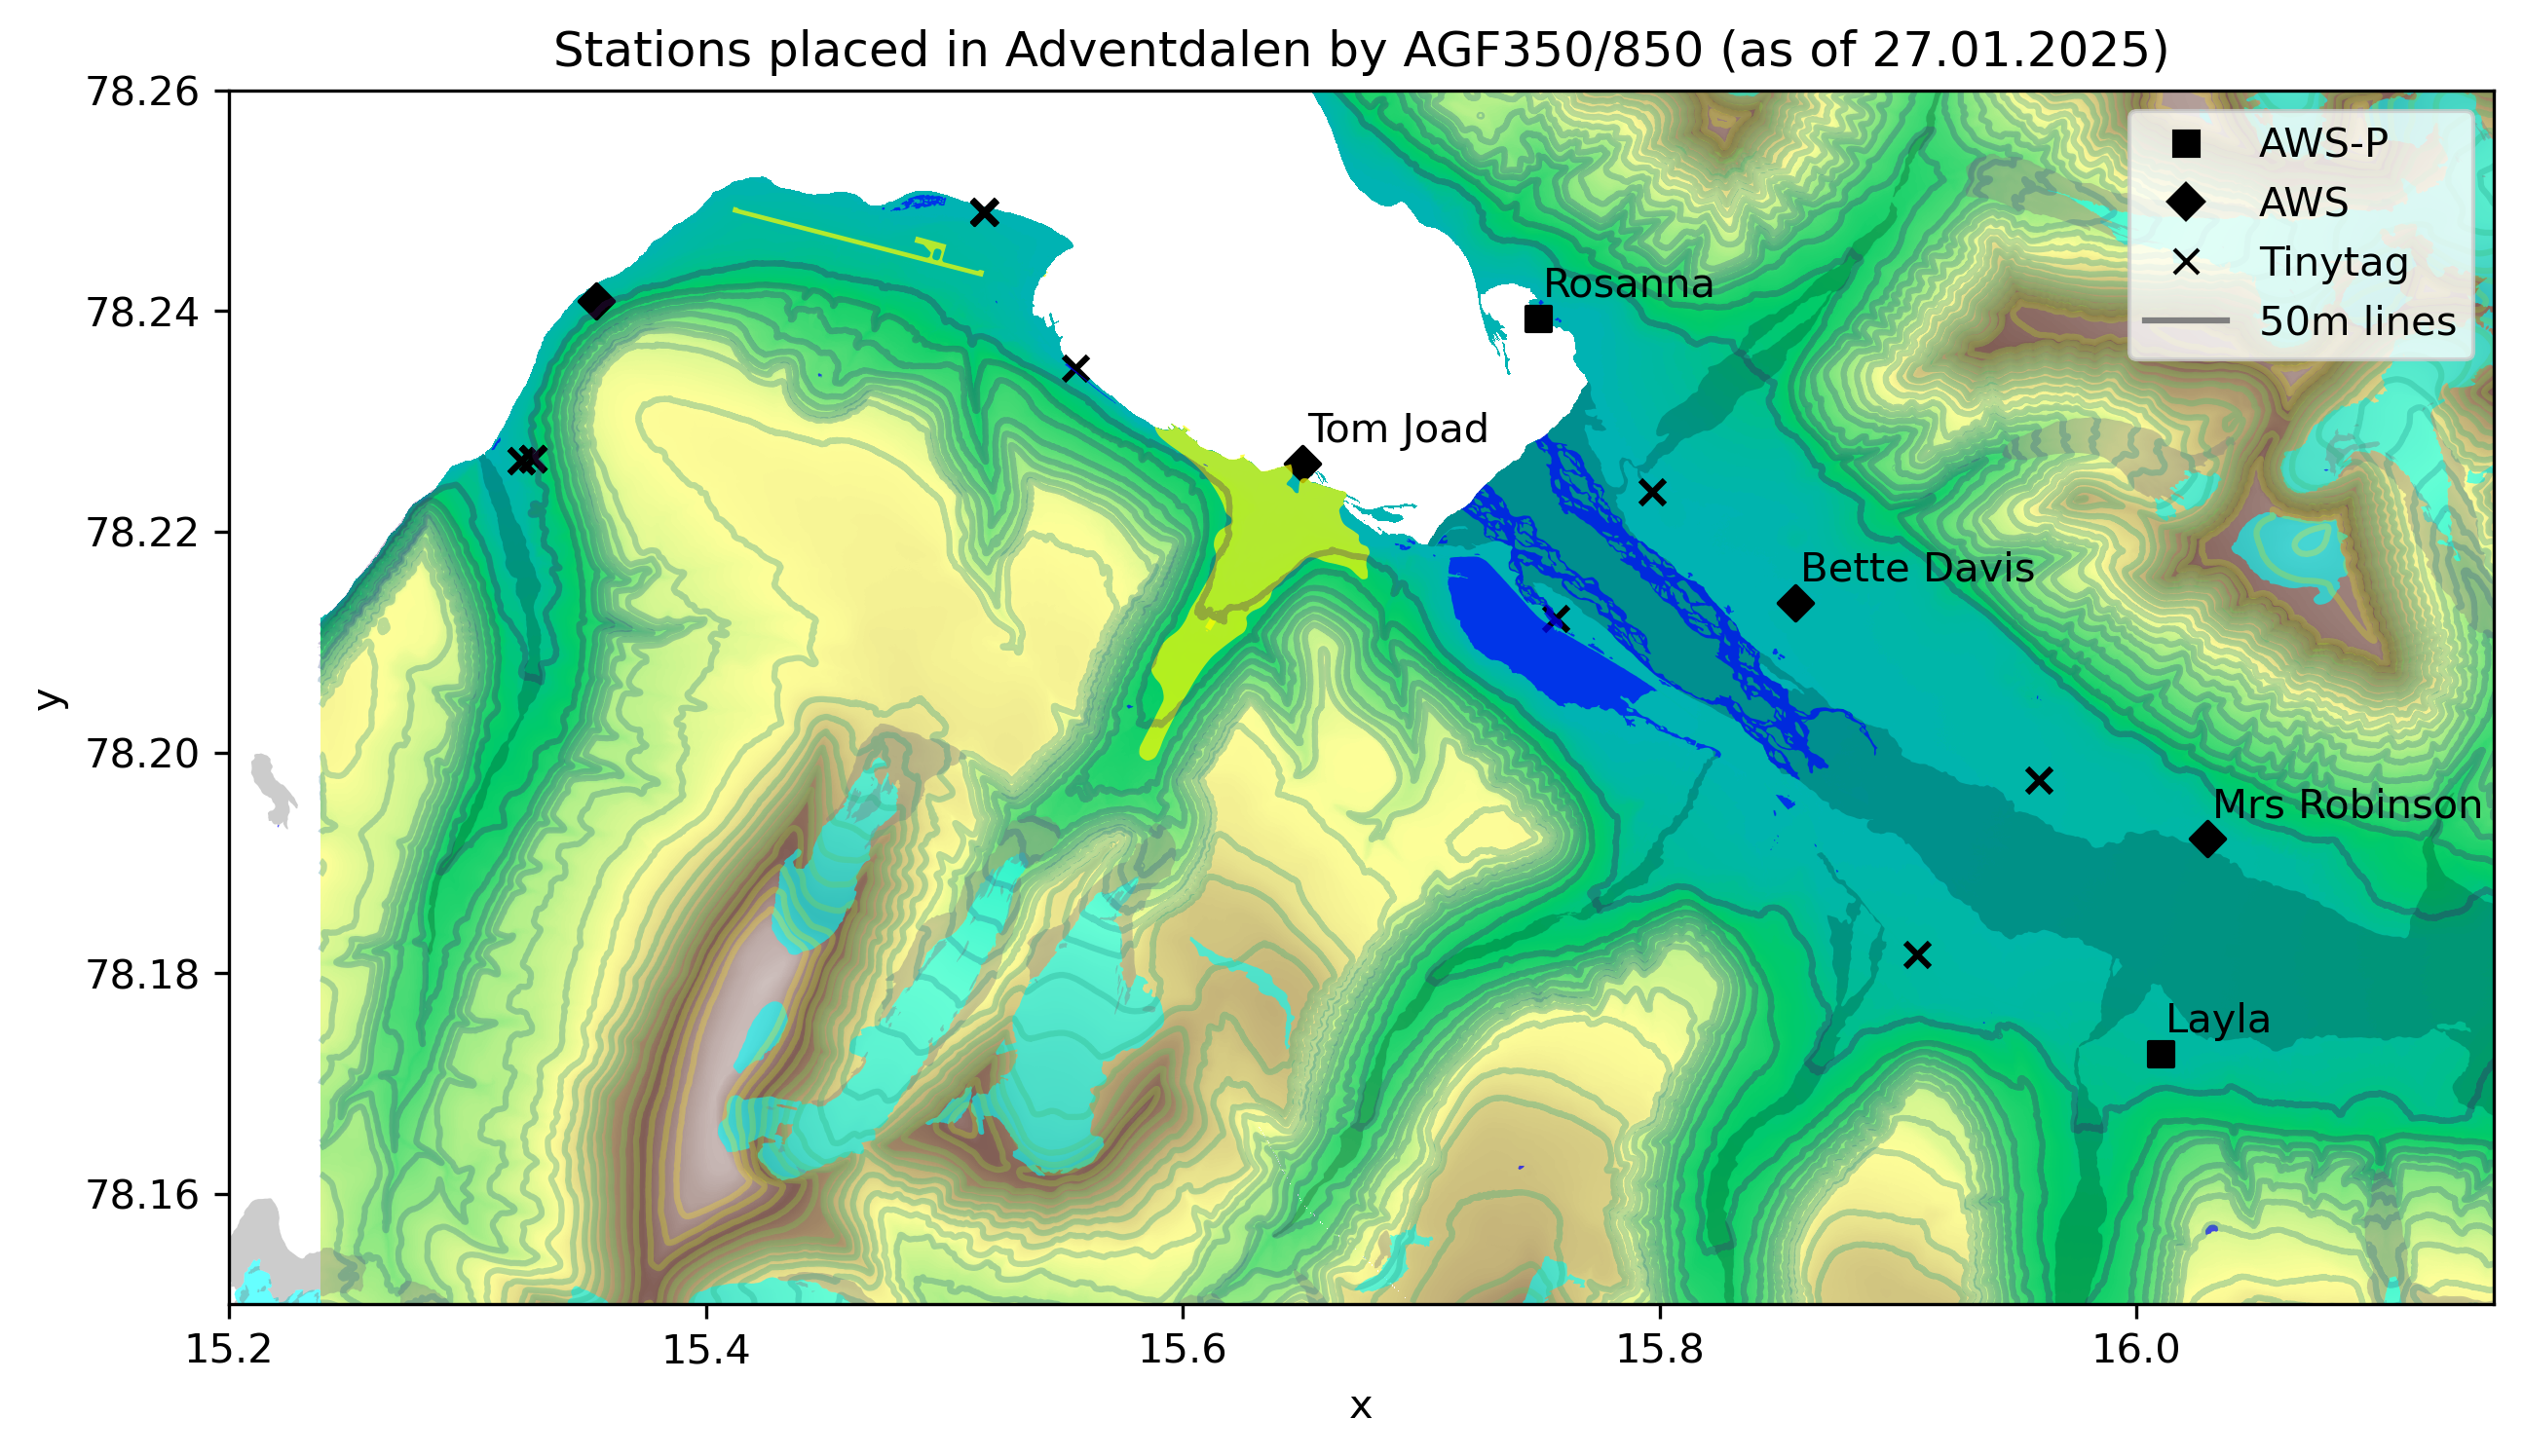

In [46]:
fig,ax = plt.subplots(figsize=(10,6), dpi=300)

DEM.plot(ax=ax, cmap=terrain_truncated, vmin=0, vmax=1050, add_colorbar=False)# cbar_kwargs={'label': "Elevation (masl)"})

ax.contour(*np.meshgrid(DEM.x, DEM.y), DEM.data.squeeze(), levels=np.arange(0, 1000, 50), color='grey', alpha=.3)

for i in range(len(stations)):
    annotate=False
    row = stations.iloc[i]
    if row.Category=='AWS-P': 
        marker='s' #square
        annotate=True
        #c='b'
    elif row.Category=='AWS': 
        marker='D' #diamond
        annotate=True
        #c='m'
    elif row.Category=='Tinytag': 
        marker='x' #filled x
        #c='orange'

    ax.scatter(row['LON (dec deg)'], row['LAT (dec deg)'], marker=marker, c='k')
    if annotate:
        ax.annotate(row['Station name'], xy = [row['LON (dec deg)'], row['LAT (dec deg)']],
                    xytext=[row['LON (dec deg)']+.002, row['LAT (dec deg)']+.002])

ax.legend([Line2D([0], [0], markerfacecolor='k', markeredgecolor='k', lw=0, marker='s'),
           Line2D([0], [0], markerfacecolor='k', markeredgecolor='k', lw=0, marker='D'),
           Line2D([0], [0], markerfacecolor='k', markeredgecolor='k', lw=0, marker='x'),
          Line2D([0], [0], c='grey')],
          ['AWS-P', 'AWS','Tinytag', '50m lines'], loc='upper right')

flood_plains.plot(ax=ax, color='k', alpha=.2)
glaciers.plot(ax=ax, color='cyan', alpha=.6)
moraine.plot(ax=ax, color='grey', alpha=.4)
#pingos.plot(ax=ax, color='k')
city.plot(ax=ax, color='yellow', alpha=.7)
lake.plot(ax=ax, color='blue', alpha=.7)

ax.set_xlim(15.2, 16.15)
ax.set_ylim(78.15, 78.26)

ax.set_title('Stations placed in Adventdalen by AGF350/850 (as of 27.01.2025)')
plt.savefig('../figs/map.png')
plt.show()

